In [1]:
from analysis import Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
PATH100_BATCH3 = "F:\Thesis\Experiments\Costs\Results\/27-06-2022 Batch-3 100.csv"
PATHME_BATCH3 = "F:\Thesis\Experiments\Costs\Results\/27-06-2022 Batch-3 ME.csv"
data100 = pd.read_csv(PATH100_BATCH3)
datame = pd.read_csv(PATHME_BATCH3)

data100 = Analysis.append_durations(data100)
datame = Analysis.append_durations(datame)
print("fast subjects ME: ", datame['duration'].isnull().values.any())
print("fast subjects 100: ", data100['duration'].isnull().values.any())

s100_data = Analysis.convert_100_data(data100)
mes_data = Analysis.convert_me_data(datame)

print("subjects that failed the attention checks in the ME survey: ", mes_data['attention_checks_passed'].loc[mes_data['attention_checks_passed'] == False].values.any())
print("subjects that failed the attention checks in the 100-level survey: ", s100_data['attention_checks_passed'].loc[s100_data['attention_checks_passed'] == False].values.any())


fast subjects ME:  False
fast subjects 100:  False
subjects that failed the attention checks in the ME survey:  False
subjects that failed the attention checks in the 100-level survey:  False


In [2]:
print(s100_data)
print(mes_data)

      TP1    TP2    TP3    TP4    TP5    TP6    TP7    TP8    TN1    TN2  ...  \
0    89.0  -64.0   83.0  -67.0   89.0   92.0  -77.0  -69.0  -78.0   76.0  ...   
1    64.0  100.0  100.0   90.0 -100.0   89.0   92.0  100.0   71.0  100.0  ...   
2     0.0    0.0    0.0    0.0    0.0    0.0    0.0  -37.0    0.0    1.0  ...   
3   100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  ...   
4     0.0  -75.0  -80.0    0.0    0.0    0.0  -48.0   23.0   71.0    0.0  ...   
5    89.0   73.0   74.0   37.0  100.0   77.0   74.0   76.0   38.0  100.0  ...   
6    99.0   97.0   96.0    0.0   98.0   94.0  -79.0    0.0   91.0   99.0  ...   
7    80.0   99.0   61.0   34.0  100.0   84.0    5.0  100.0   92.0   86.0  ...   
8    50.0   81.0   81.0   75.0  100.0   73.0   41.0   65.0   83.0   86.0  ...   
9   100.0  100.0  100.0  100.0  100.0  100.0   98.0   72.0 -100.0   67.0  ...   
10    0.0   60.0   52.0   61.0    0.0  -70.0   59.0   50.0    0.0   70.0  ...   
11   75.0  -12.0  -21.0  -79

In [3]:
print("ME scale")
Analysis.print_means(mes_data)
print("100-level scale")
Analysis.print_means(s100_data)


ME scale
TP 24.236676
TN 45.805116
FP -22.650769
FN -30.389697
REJ -16.679127
100-level scale
TP 46.0
TN 58.76875
FP -38.45625
FN -45.85625
REJ -18.63125


In [4]:
Analysis.print_reliabilities(mes_data, scale="ME")

Reliability scale:  0.9905048581529757
TP 0.19051911069691796
TN -0.0717672397869471
FP -0.15888875645365474
FN 0.4591476230364122
REJ 0.36720270246283826


In [5]:
Analysis.print_reliabilities(s100_data, scale="S100")


Reliability scale:  0.4121309798558841
TP -0.0041932902540045
TN 0.12443386861592676
FP 0.03306423033868178
FN 0.1489049472370485
REJ 0.16247411987298044


In [6]:
Analysis.print_statistics(data_mes=mes_data, data_s100=s100_data)

Cohen's d -0.007271045084500217
Shapiro Wilk normality test MES:  ShapiroResult(statistic=0.9308469891548157, pvalue=0.01716577634215355)
Shapiro Wilk normality test S100:  ShapiroResult(statistic=0.9493520259857178, pvalue=0.07203701138496399)
Bartlett's test for equal variances:   BartlettResult(statistic=5.749655093800101, pvalue=0.01649189433720493)
Mann-Whitney U test:  MannwhitneyuResult(statistic=816.0, pvalue=0.8814362042469366)
Unpaired T-test:  Ttest_indResult(statistic=-0.032108065717297234, pvalue=0.9744678903342594)
Pearson:  (0.9301199477173892, 4.053105373022302e-18)
Spearman:  SpearmanrResult(correlation=0.9165103189493434, pvalue=1.0561944509436541e-16)
Kendall:  KendalltauResult(correlation=0.7615384615384616, pvalue=4.493712337046585e-12)


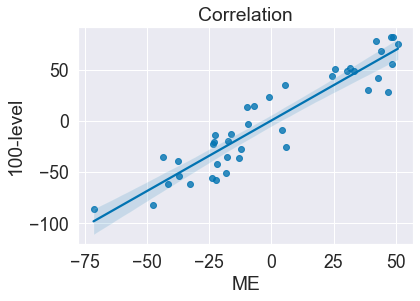

In [7]:
%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set(font_scale = 1.6, palette="colorblind")
Analysis.plot_validity(data_mes=mes_data, data_s100=s100_data)

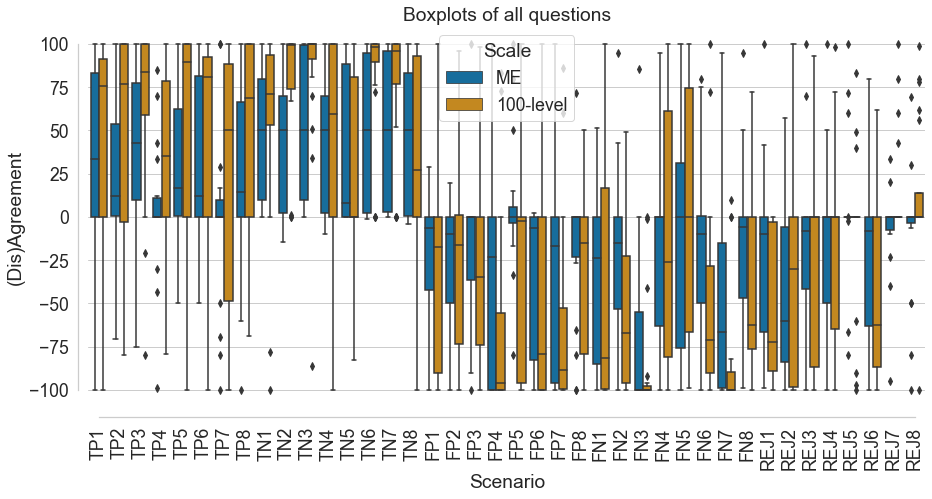

In [8]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_dual_boxplots(data_mes=mes_data, data_s100=s100_data)

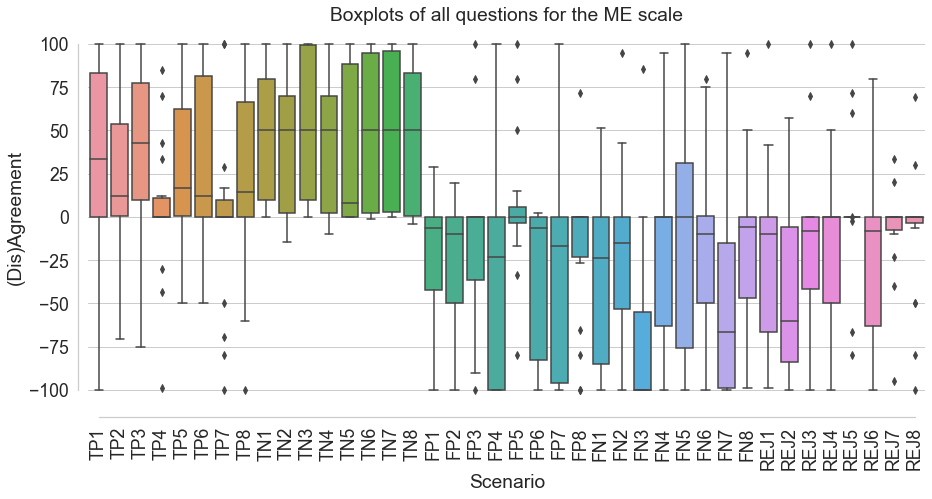

In [9]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=mes_data, scale_title="ME")

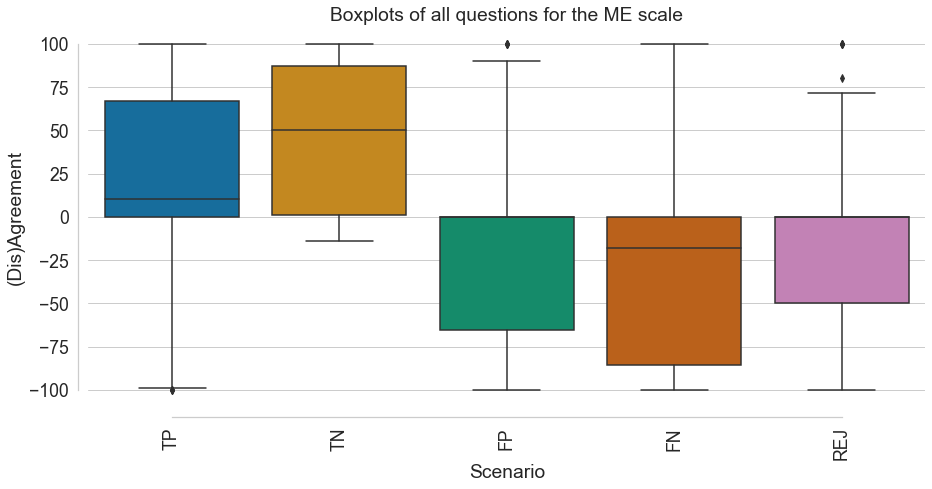

In [10]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=mes_data, scale_title="ME", show_individual=False)

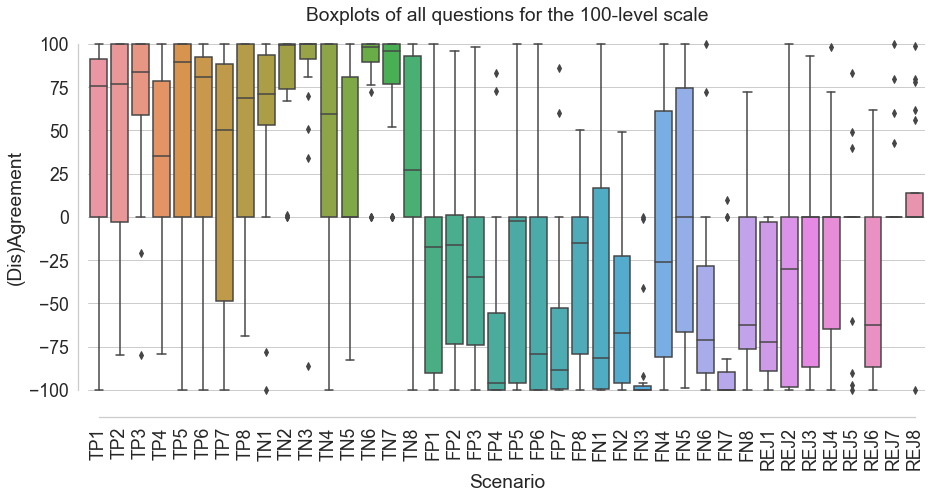

In [11]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=s100_data, scale_title="100-level")

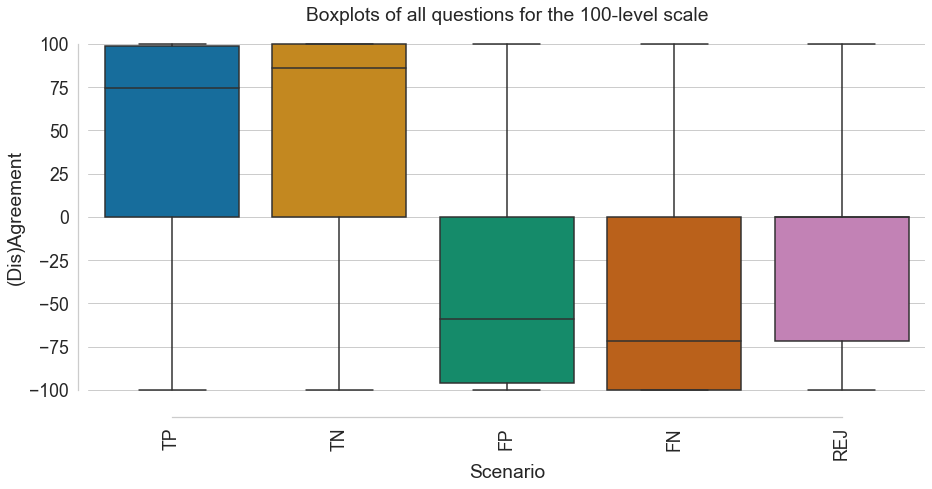

In [12]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=s100_data, scale_title="100-level", show_individual=False)

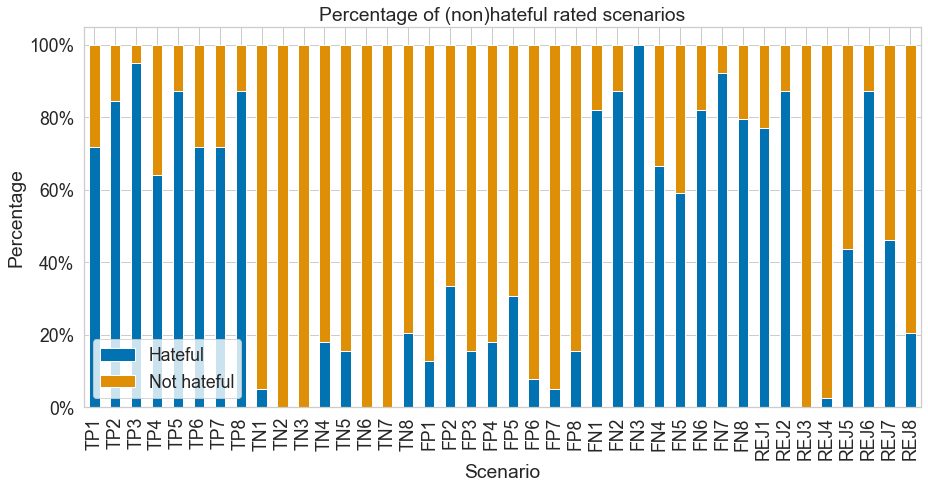

In [13]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_hatefulness(data_mes=mes_data, data_s100=s100_data)